In [ ]:
import uproot
import hist

In [ ]:
1+1

In [23]:
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")

In [12]:
f_ = uproot.open("templates_UL17_1d_unfolding.root")

(0.0, 650000.0)

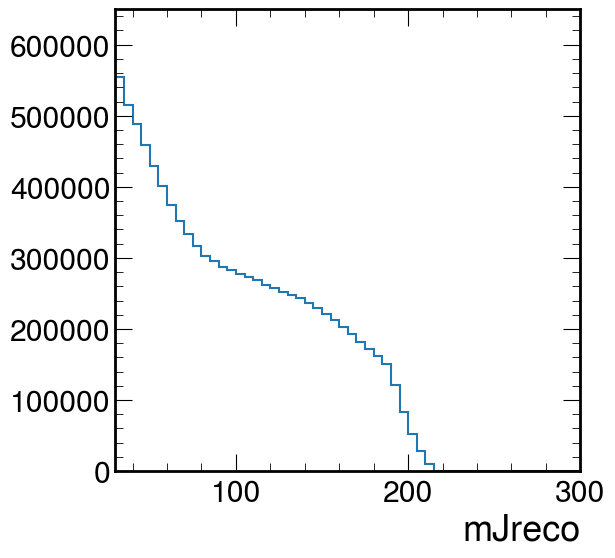

In [49]:
f,ax = plt.subplots(figsize=(6,6))

f_["W_Data__mjet_500to575_fail"].to_hist()[hist.rebin(5)].plot(ax=ax)
ax.set_xlim(30,300)
ax.set_ylim(0,650e3)
#ax.set_yscale("log")

In [177]:
import numpy as np


In [270]:
pt_bins = np.array([500.0, 575.0, 650.0, 725.0, 800.0, 1000.0, 1200.0])
min_msd, max_msd = (30, 300)
binwidth = 5
nbins = int(np.floor((max_msd - min_msd) / binwidth))
msd_bins = np.linspace(min_msd, nbins * binwidth + min_msd, nbins + 1)

ptpts, msdpts = np.meshgrid(
    pt_bins[:-1] + 0.3 * np.diff(pt_bins),
    msd_bins[:-1] + 0.5 * np.diff(msd_bins),
    indexing="ij"
)
rhopts = 2 * np.log(msdpts / ptpts)
ptscaled = (ptpts - pt_bins[0]) / (pt_bins[-1] - pt_bins[0])
rho_min = 2*np.log(msd_bins[0]/pt_bins[-1])
rhoscaled = (rhopts - (rho_min)) / ((-2.1) - (rho_min))



In [309]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]



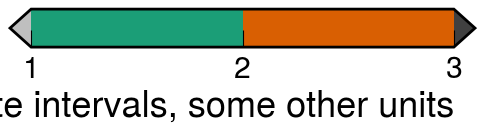

In [318]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(matplotlib
        .with_extremes(over='0.25', under='0.75'))

bounds = [1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

In [ ]:
#7570b3

/tmp/ipykernel_96770/2978992272.py:9: RuntimeWarning: invalid value encountered in log
  rho_ = 2*np.log(msd_/pt_)


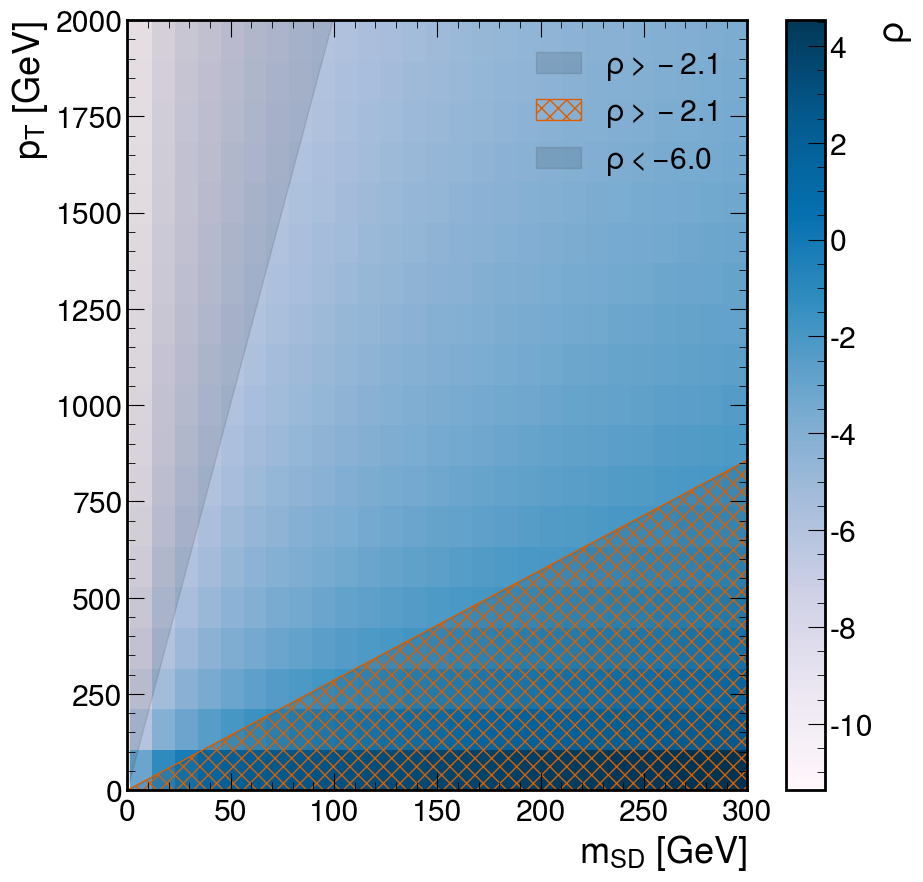

In [325]:
f,ax = plt.subplots()
msd = np.linspace(-10,310,30)
pt = np.linspace(0,2000,20)
pt_,msd_ = np.meshgrid(
    pt[:-1] + 0.3 * np.diff(pt),
    msd[:-1] + 0.5 * np.diff(msd),
    indexing="ij"
)
rho_ = 2*np.log(msd_/pt_)
#c = ax.pcolormesh(msd,pt,rho_, cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["#1b9e77","#d95f02"]))
c = ax.pcolormesh(msd,pt,rho_, cmap='PuBu')
f.colorbar(c, ax=ax,label=r"$\rho$")

def pt_from_rho(msd_,rho_,masked=False):
    pt_ = msd_/np.exp(rho_/2)
    if masked:
        mask = (pt_<=pt[-1]) & (pt_ >= pt[0])
        return msd_[mask],pt_[mask]
    else:
        #pt_[pt_>pt[-1]]= pt[-1]
        #pt_[pt_<pt[0]]= pt[0]
        return pt_
#ax.contour(msd[:-1], pt[:-1], (rho_<=-2.1) & (rho_ >=-6.0 ), 1, label = r"$-6.0 \leq \rho \leq -2.1$")
#ax.contour(msd[:-1], pt[:-1], (rho_<=-2.1) & (rho_ >=rho_min ), 1, label = r"$%.2f \leq \rho \leq -2.1$" % rho_min)
msd_centers = msd[:-1] + 0.5 * np.diff(msd)
#ax.plot(*pt_from_rho(msd_centers,-2.1), label = r"$-6.0 \leq \rho \leq -2.1$",color="k",alpha=0.6)
#ax.plot(*pt_from_rho(msd_centers,-6.0),color="k",alpha=0.6)

#ax.fill_between(*pt_from_rho(msd_centers,-2.1,True),pt_from_rho(msd_centers,-6.0,True)[1],alpha=0.1,color="k",hatch="\\",label=r"$-6.0 \leq \rho \leq -2.1$")
#ax.fill_between(*pt_from_rho(msd_centers,-2.1,True),pt_from_rho(msd_centers,rho_min,True)[1],alpha=0.1,color="g",hatch="/",label=r"$%.2f \leq \rho \leq -2.1$"%rho_min)

ax.fill_between(
    msd_centers, 
    pt_from_rho(msd_centers,-2.1),np.ones_like(msd_centers)*pt[0],
    alpha=0.1,color="k",label=r"$\rho > -2.1$",
)
ax.fill_between(
    msd_centers, 
    pt_from_rho(msd_centers,-2.1),np.ones_like(msd_centers)*pt[0],
    alpha=1.0,label=r"$\rho > -2.1$",
    linewidth=1,hatch="xx",
    edgecolor='#d95f02',
    facecolor="none",
)
ax.fill_between(msd_centers, np.ones_like(msd_centers)*pt[-1], pt_from_rho(msd_centers,-6.0),alpha=0.1,color="k",label=r"$\rho < -6.0$")
#ax.fill_between(*pt_from_rho(msd_centers,-2.1,True),pt_from_rho(msd_centers,rho_min,True)[1],alpha=0.1,color="g",hatch="/",label=r"$%.2f \leq \rho \leq -2.1$"%rho_min)

ax.set_ylim(pt[0],pt[-1])
ax.set_xlim(0,300)
##ax.plot(*pt_from_rho(msd_centers,-2.1), label = r"$-6.0 \leq \rho \leq -2.1$",color="k")
#ax.plot(*pt_from_rho(msd_centers,rho_min),color="k",linestyle="--",alpha=0.6, label=r"$%.2f \leq \rho$"%rho_min)
##ax.contour(msd[:-1], pt[:-1], (rho_<=-2.1) & (rho_ >=rho_min ), 1, label = r"$%.2f \leq \rho \leq -2.1$" % rho_min)

ax.set_ylabel(r"$p_{T}$ [GeV]")
ax.set_xlabel(r"$m_\mathrm{SD}$ [GeV]")
ax.legend()
f.savefig("plots/rho_info_plot.pdf",bbox_inches="tight")

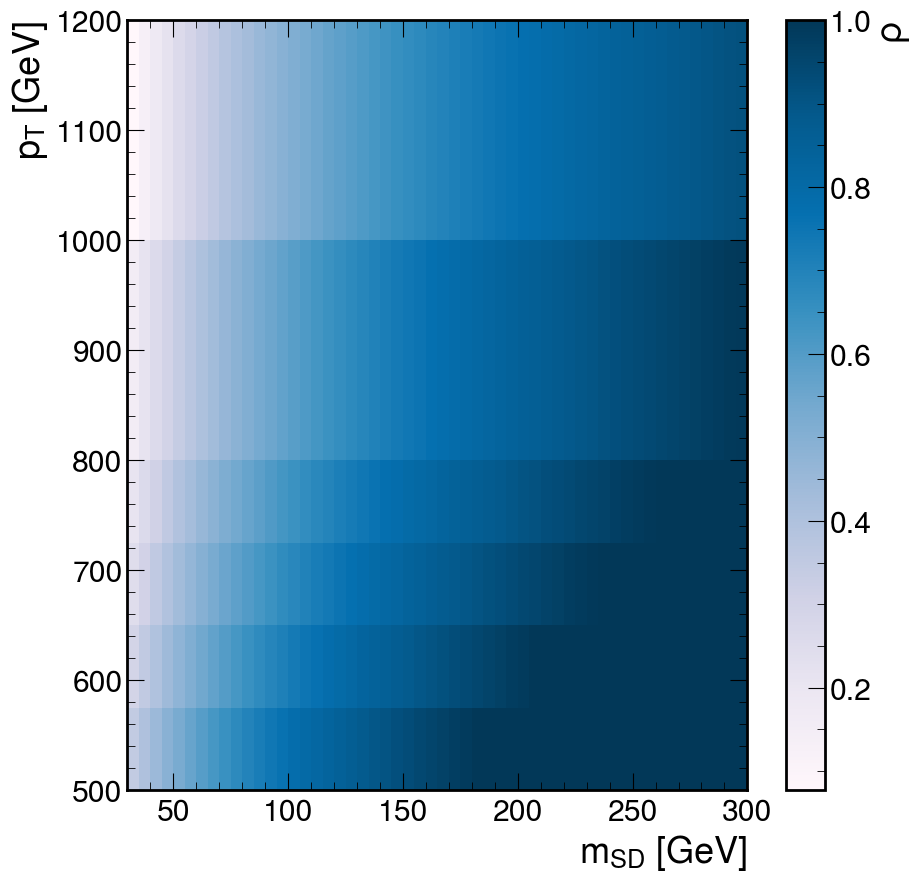

In [233]:
validbins = (rhoscaled >= 0) & (rhoscaled <= 1)
rhoscaled[~validbins] = 1  # we will mask these out later

f,ax = plt.subplots()

c = ax.pcolormesh(msd_bins,pt_bins,rhoscaled, cmap='PuBu')
f.colorbar(c, ax=ax,label=r"$\rho$")
ax.set_ylabel(r"$p_{T}$ [GeV]")
ax.set_xlabel(r"$m_\mathrm{SD}$ [GeV]")

f.savefig("plots/rho_scaled_masked.pdf",bbox_inches="tight")

In [ ]:
f,ax = plt.subplots()


In [ ]:
msd